# Chapter 1 - Single Variable Optmizers - Line Search

### Contents: 
1. Introduction
2. Bracketing and Golden Section Search
4. Inverse Parabolic Interpolation
6. Newton's Method


## 1. Introduction

### Problem: 
We want to minimize a proble of a single real variable __without constraints__

### Method 1:

We can use differential calculus to achieve this:

$$ f(x)=x^2-Ax-1 $$
$$ f'(x)=2x-4 $$
$$ f''(x)=2 $$

And we have a minimum at 2
But this fails for functions/data which are:
1. Not continous 
2. Noisy 
3. Having multiple local max/minimums



### Method 2: Bracketing & Golden Section Search

We want to bracket the minimum of 
A bracket is a series of __three__ values of $ f(x) $ such that:

- $f(x_{2}) < f(x_{1})$
- $f(x_{2})<f(x_{3})$

Steps:
1. Guess two values of $ x $ and get the $ f(x) $ for these
2. If $ f(x_{2}) $ is greater than  $ f(x_{3}) $ , add a new (extended) $ x_{3} $ and delete $ x_{1} $
3. If $ f(x_{2}) $ is greater than  $ f(x_{1}) $ , add a new (extended) $ x_{1} $ and delete $ x_{3} $
4. A bracket will be found if the conditions above are met
    - Increasing step-size by 1.6180 constitutes the golden ratio method

Bracketing interval: (-2.0225000000000035, -1.9901400000000038)


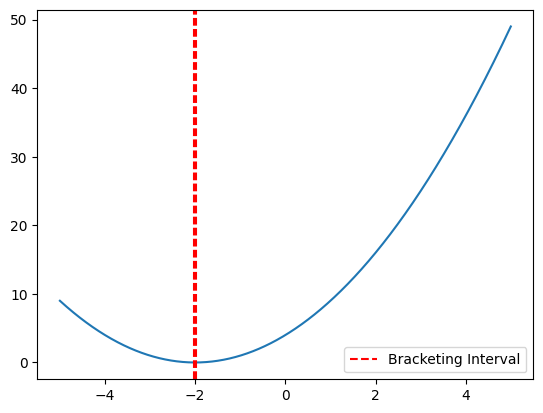

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f_x(x):
    return x**2.0 + 4.0 * x + 4.0

def bracketing(f, x=0, h=0.01, k=1.6180):
    x1, x2, x3 = x, x + h, x + 2 * h
    
    f_x1, f_x2, f_x3 = f(x1), f(x2), f(x3)
    
    while True:
        if f_x2 < f_x1 and f_x2 < f_x3:
            # If the function value at x2 is less than at x1 and x3, return the bracket
            return x1, x3
        elif f_x2 > f_x3:
            # If the function value at x2 is greater than at x3, move x1 to x2 and extend x3
            x1, x2, x3 = x2, x3, x3 + h*k
            f_x1, f_x2, f_x3 = f_x2, f_x3, f(x3)
        else:
            # If the function value at x2 is greater than at x1, move x3 to x2 and extend x1
            x1, x2, x3 = x1 - h*k, x1, x2
            f_x1, f_x2, f_x3 = f(x1), f_x1, f_x2

# Example usage
bracket = bracketing(f_x)
print("Bracketing interval:", bracket)

# Plot to demosntrate this graphically
X=np.linspace(-5,5,1000)
plt.plot(X,f_x(X))
plt.axvline(x=bracket[0], color='r', linestyle='--', label='Bracketing Interval')
plt.axvline(x=bracket[1], color='r', linestyle='--')
plt.legend()

We can then fit a polynomial function (quadratic in this case) to find the minimum. 
* If a minimum is not found increase step-size by k

#### Benefits of bracketing search
Bracketing methods, despite their limitations, offer several advantages in optimization:

1. **Guaranteed Convergence**: Bracketing methods guarantee convergence to a local minimum within a specified bracketing interval, provided the function is unimodal within that interval. This makes them reliable for finding at least one local minimum.

2. **Simplicity**: Bracketing methods are relatively simple and intuitive to implement. They involve iteratively expanding or contracting a bracketing interval based on function evaluations, making them accessible to both beginners and experienced practitioners.

3. **No Derivative Information Required**: Bracketing methods do not require derivative information (such as gradients or Hessians) of the objective function. This makes them applicable to a wide range of functions, including non-smooth or discontinuous functions.

4. **Robustness**: Bracketing methods are generally robust against noise or fluctuations in the objective function. Since they rely on function evaluations rather than derivatives, they can handle functions with irregular behavior or noise more gracefully.

5. **Global Optimization**: While bracketing methods focus on finding local minima, they can also be used as part of global optimization strategies. By applying bracketing methods iteratively from multiple starting points, it's possible to explore the entire search space more comprehensively.

6. **Parallelizable**: Bracketing methods are inherently parallelizable, as the evaluation of function values at different points can be performed independently. This makes them suitable for parallel or distributed computing environments, where multiple function evaluations can be conducted simultaneously.

7. **Applicability to Black-Box Optimization**: Bracketing methods are well-suited for black-box optimization scenarios, where the underlying function is unknown or difficult to model analytically. They rely solely on function evaluations and do not require any knowledge of the function's analytical form.

8. **Flexibility**: Bracketing methods can be adapted and combined with other optimization techniques to improve their performance or address specific challenges. For example, they can be integrated with derivative-based methods for hybrid optimization schemes.

Overall, bracketing methods offer a balance of simplicity, robustness, and effectiveness, making them valuable tools in the optimization toolbox for both theoretical analysis and practical applications.

#### Downsides
Bracket search, like any optimization algorithm, has its limitations and potential downsides:

1. **Convergence Rate**: Bracketing methods might converge slowly, especially if the bracketing interval is initially wide or if the function has irregular behavior (e.g., oscillations) within the bracketing interval. This can result in a larger number of iterations required to find the minimum.

2. **Sensitivity to Initial Guess**: The effectiveness of bracketing methods can be sensitive to the choice of initial guess and step size. An inappropriate initial guess or step size might lead to failure in bracketing the minimum or an inefficient search process.

3. **Assumption of Unimodal Functions**: Bracketing methods typically assume that the function being optimized is unimodal within the bracketing interval (i.e., it has only one minimum). If the function is multimodal or has multiple local minima within the interval, bracketing methods might fail to find the global minimum.

4. **Limited to Single-Variable Optimization**: Bracketing methods are generally designed for optimizing single-variable functions. They might not be directly applicable to multi-variable optimization problems without appropriate modifications or extensions.

5. **Computationally Intensive**: In some cases, bracketing methods might require a relatively large number of function evaluations to converge to a satisfactory solution, especially if the function evaluations are computationally expensive.

6. **Not Suitable for Noisy Functions**: Bracketing methods might struggle with functions that exhibit significant noise or fluctuations, as these can lead to erroneous decisions about the direction of the bracketing steps.

7. **Robustness**: Bracketing methods might not always guarantee robustness against certain types of pathological functions or corner cases. Careful consideration and testing are necessary to ensure the reliability and robustness of the algorithm.

Despite these potential downsides, bracketing methods can still be effective and useful in many optimization scenarios, particularly when dealing with smooth and well-behaved functions, and when combined with other optimization techniques for improved performance and robustness.

### Method 4: Inverse parabolic interpolation

Inverse parabolic interpolation is a method used in optimization algorithms to refine an estimate of the location of the minimum (or maximum) of a function. It is often employed in combination with bracketing methods to improve the accuracy of the estimated minimum.

The basic idea of inverse parabolic interpolation is to fit a parabola to three points (let's call them \( x_1 \), \( x_2 \), and \( x_3 \)) in such a way that the minimum of the parabola corresponds to a better estimate of the minimum of the function. This parabola is then used to calculate a refined estimate of the minimum.

Here are the general steps involved in inverse parabolic interpolation:

1. Choose three distinct points \( x_1 \), \( x_2 \), and \( x_3 \) that bracket the minimum of the function.
2. Evaluate the function values \( f(x_1) \), \( f(x_2) \), and \( f(x_3) \) at these points.
3. Fit a parabola to these three points. This involves solving a system of equations to find the coefficients of the parabola that passes through the three points.
4. Calculate the minimum of the parabola. This is done by finding the \( x \)-coordinate of the vertex of the parabola, which corresponds to the refined estimate of the minimum of the function.
5. Use this refined estimate as the new \( x_3 \) and repeat the process until convergence or a desired level of accuracy is achieved.

Inverse parabolic interpolation is particularly useful when combined with bracketing methods like the Brent's method or the Golden-section search, as it helps to refine the estimate of the minimum within the bracketing interval. It can improve the convergence rate and accuracy of the optimization algorithm, especially in cases where the function is smooth and well-behaved.

In [3]:
def inverse_parabolic_interpolation(f, x1, x2, x3, tol=1e-6, max_iter=100):
    """
    Perform inverse parabolic interpolation to refine the estimate of the minimum of the function f.
    
    Parameters:
        f (function): The objective function to minimize.
        x1, x2, x3 (float): Three distinct points that bracket the minimum.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations.
        
    Returns:
        float: Refined estimate of the minimum.
    """
    for _ in range(max_iter):
        # Evaluate function values at the three points
        f1, f2, f3 = f(x1), f(x2), f(x3)
        
        # Fit a quadratic polynomial through the three points
        coeff = np.polyfit([x1, x2, x3], [f1, f2, f3], 2)
        
        # Find the minimum of the polynomial
        a, b, c = coeff
        x_min = -b / (2 * a)
        
        # Check convergence
        if abs(x_min - x2) < tol:
            return x_min
        
        # Update x3
        x3 = x2
        x2 = x_min
    
    raise RuntimeError("Inverse parabolic interpolation did not converge within the maximum number of iterations.")

# Example usage:
def f(x):
    return x**2 - 4*x + 4  # Example function: (x-2)^2, minimum at x=2

x1 = 0.5
x2 = 1.0
x3 = 1.5

refined_min = inverse_parabolic_interpolation(f, x1, x2, x3)
print("Refined estimate of the minimum:", refined_min)

Refined estimate of the minimum: 1.9999999999999987


### Method 5: Newton's Method

Refer numerical methods notes + GitHub 

In [2]:
#Example code copy and paste from GitHub of Numerical Methods here